# Exploratory Data Analysis

## By: **Harshita Aswani**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("/kaggle/input/walmart-sales-analysis/Walmart.csv")

In [5]:
df.head()

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,13-06-2013,17-06-2013,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97
3,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78


In [6]:
df.tail()

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
3198,CA-2013-125794,30-09-2013,04-10-2013,Maris LaWare,United States,Los Angeles,California,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.24,1.0,15.22
3199,CA-2014-121258,27-02-2014,04-03-2014,Dave Brooks,United States,Costa Mesa,California,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.96,2.0,15.63
3200,CA-2014-121258,27-02-2014,04-03-2014,Dave Brooks,United States,Costa Mesa,California,Phones,Aastra 57i VoIP phone,258.58,2.0,19.39
3201,CA-2014-121258,27-02-2014,04-03-2014,Dave Brooks,United States,Costa Mesa,California,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.60,4.0,13.32
3202,CA-2014-119914,05-05-2014,10-05-2014,Chris Cortes,United States,Westminster,California,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.16,2.0,72.95


In [7]:
df.shape

(3203, 12)

In [8]:
df.size

38436

In [9]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Customer Name', 'Country',
       'City', 'State', 'Category', 'Product Name', 'Sales', 'Quantity',
       'Profit'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       3203 non-null   object 
 1   Order Date     3203 non-null   object 
 2   Ship Date      3203 non-null   object 
 3   Customer Name  3203 non-null   object 
 4   Country        3203 non-null   object 
 5   City           3203 non-null   object 
 6   State          3203 non-null   object 
 7   Category       3203 non-null   object 
 8   Product Name   3203 non-null   object 
 9   Sales          3203 non-null   float64
 10  Quantity       3203 non-null   float64
 11  Profit         3203 non-null   float64
dtypes: float64(3), object(9)
memory usage: 300.4+ KB


In [11]:
df.describe()

,Sales,Quantity,Profit
count,3203.000000,3203.000000,3203.000000
mean,226.493266,3.828910,33.849138
std,524.876911,2.260947,174.109155
min,0.990000,1.000000,-3399.980000
25%,19.440000,2.000000,3.850000
50%,60.840000,3.000000,11.170000
75%,215.810000,5.000000,33.000000
max,13999.960000,14.000000,6719.980000


In [12]:
df.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Customer Name    0
Country          0
City             0
State            0
Category         0
Product Name     0
Sales            0
Quantity         0
Profit           0
dtype: int64

In [13]:
df.duplicated().value_counts()

False    3203
dtype: int64

In [14]:
sales_by_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print(sales_by_category)

Category
Chairs         101781.36
Phones          98684.39
Tables          84754.60
Storage         70532.84
Accessories     61114.10
Binders         55961.11
Copiers         49749.23
Machines        42444.14
Bookcases       36004.18
Appliances      30236.32
Furnishings     30072.73
Paper           26663.73
Supplies        18127.12
Art              9212.06
Labels           5078.72
Envelopes        4118.10
Fasteners         923.20
Name: Sales, dtype: float64


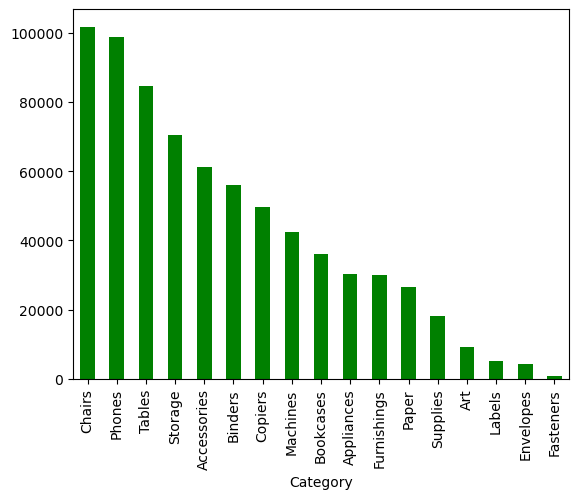

In [15]:
sales_by_category.plot(kind='bar', color='green')
plt.show()

In [16]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.month
average_sales_per_month = df.groupby('Month')['Sales'].mean()
print(average_sales_per_month)

Month
1     266.847467
2     222.428571
3     276.234050
4     222.331633
5     229.070139
6     211.696605
7     261.987261
8     235.161869
9     186.921716
10    209.842862
11    204.813416
12    231.942423
Name: Sales, dtype: float64


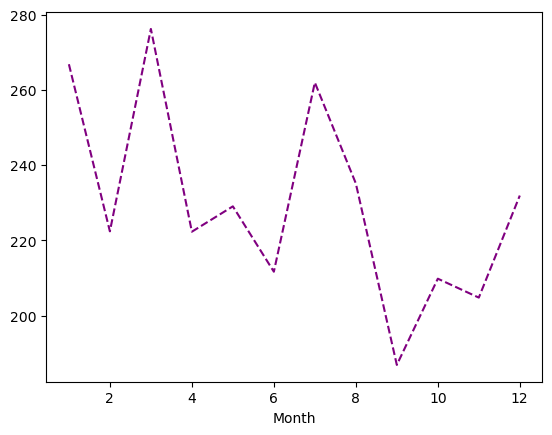

In [28]:
average_sales_per_month.plot(kind='line', color='purple', ls='--')
plt.show()

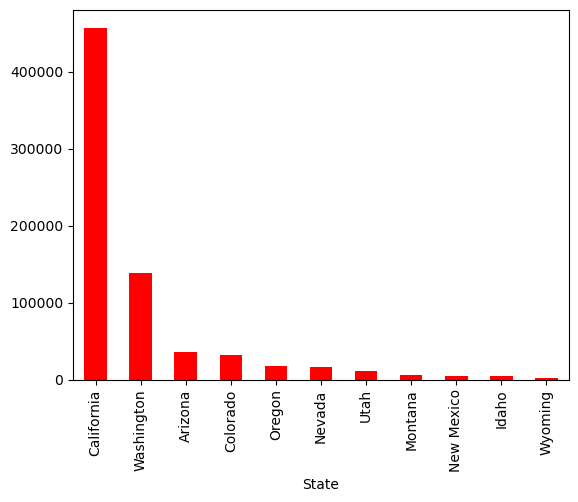

In [18]:
sales_by_state = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
sales_by_state.plot(kind='bar', color='red')
plt.show()

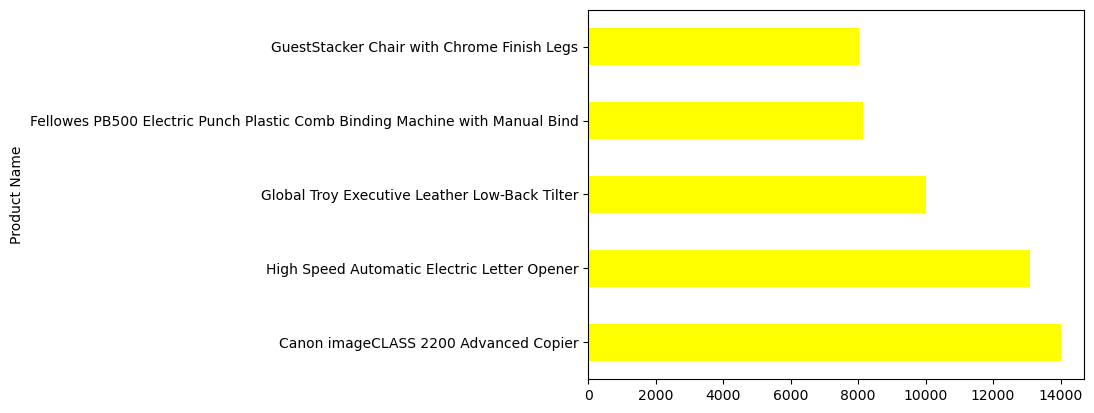

In [35]:
sales_by_product = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)
sales_by_product.head().plot(kind='barh', color='yellow')
plt.show()

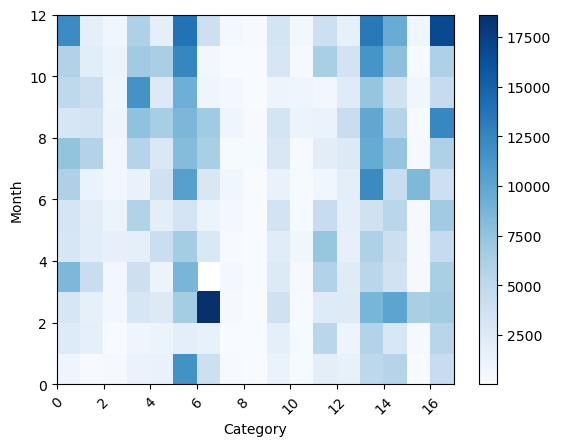

In [20]:
sales_by_month_category = df.groupby(['Month', 'Category'])['Sales'].sum().unstack()
plt.pcolor(sales_by_month_category, cmap='Blues')
plt.xlabel('Category')
plt.ylabel('Month')
plt.xticks(rotation=45)
plt.colorbar()
plt.show()

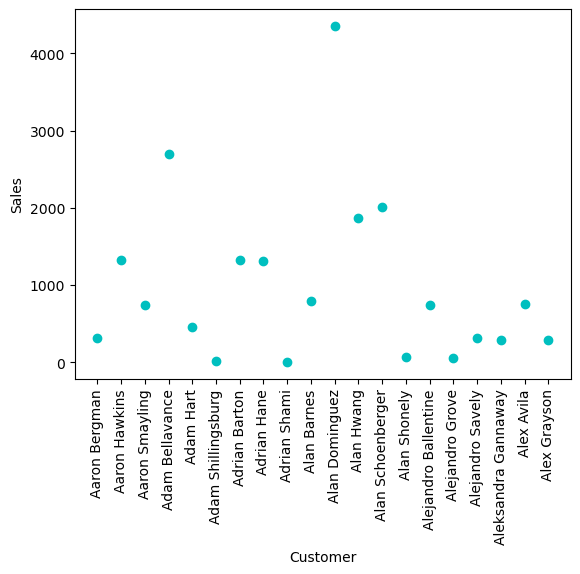

In [32]:
sales_by_customer = df.groupby('Customer Name')['Sales'].sum()
plt.scatter(sales_by_customer.head(20).index, sales_by_customer.head(20).values, c='c')
plt.xlabel('Customer')
plt.xticks(rotation=90)
plt.ylabel('Sales')
plt.show()

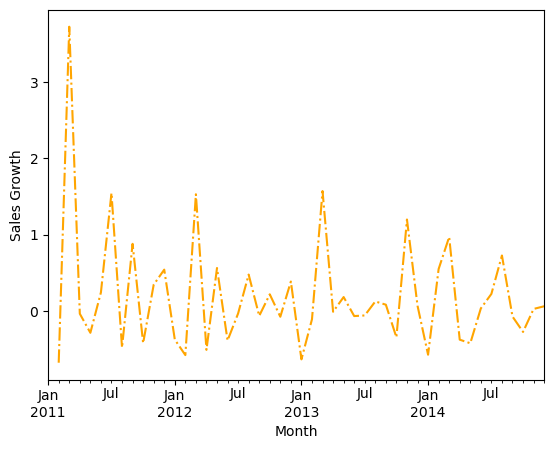

In [34]:
monthly_sales = df.groupby(pd.Grouper(key='Order Date', freq='M'))['Sales'].sum()
monthly_sales_growth = monthly_sales.pct_change()
monthly_sales_growth.plot(kind='line', ls='-.', color='orange')
plt.xlabel('Month')
plt.ylabel('Sales Growth')
plt.show()